In [1]:
from chebGreen.greenlearning.utils import DataProcessor
from chebGreen.greenlearning.model import *
from chebGreen.backend import plt
from chebGreen.utils import runCustomScript

# %env TF_MLC_LOGGING=1
# %env TF_CPP_MIN_LOG_LEVEL=2

In [2]:
example = 'laplace'
script = 'generate_example'

In [3]:
%%time
runCustomScript(script,example)

### Example = laplace ###
Number of samples: 250
Length scale: 0.01
Nf: 250
Nu: 100
Noise: 0%
---------------------------------------
Step = 1/250
Step = 2/250
Step = 3/250
Step = 4/250
Step = 5/250
Step = 6/250
Step = 7/250
Step = 8/250
Step = 9/250
Step = 10/250
Step = 11/250
Step = 12/250
Step = 13/250
Step = 14/250
Step = 15/250
Step = 16/250
Step = 17/250
Step = 18/250
Step = 19/250
Step = 20/250
Step = 21/250
Step = 22/250
Step = 23/250
Step = 24/250
Step = 25/250
Step = 26/250
Step = 27/250
Step = 28/250
Step = 29/250
Step = 30/250
Step = 31/250
Step = 32/250
Step = 33/250
Step = 34/250
Step = 35/250
Step = 36/250
Step = 37/250
Step = 38/250
Step = 39/250
Step = 40/250
Step = 41/250
Step = 42/250
Step = 43/250
Step = 44/250
Step = 45/250
Step = 46/250
Step = 47/250
Step = 48/250
Step = 49/250
Step = 50/250
Step = 51/250
Step = 52/250
Step = 53/250
Step = 54/250
Step = 55/250
Step = 56/250
Step = 57/250
Step = 58/250
Step = 59/250
Step = 60/250
Step = 61/250
Step = 62/250
Step = 

In [4]:
data = DataProcessor("datasets/laplace/data.mat")
data.generateDataset(trainRatio = 0.95)

 = 199/250
Step = 200/250
Step = 201/250
Step = 202/250
Step = 203/250
Step = 204/250
Step = 205/250
Step = 206/250
Step = 207/250
Step = 208/250
Step = 209/250
Step = 210/250
Step = 211/250
Step = 212/250
Step = 213/250
Step = 214/250
Step = 215/250
Step = 216/250
Step = 217/250
Step = 218/250
Step = 219/250
Step = 220/250
Step = 221/250
Step = 222/250
Step = 223/250
Step = 224/250
Step = 225/250
Step = 226/250
Step = 227/250
Step = 228/250
Step = 229/250
Step = 230/250
Step = 231/250
Step = 232/250
Step = 233/250
Step = 234/250
Step = 235/250
Step = 236/250
Step = 237/250
Step = 238/250
Step = 239/250
Step = 240/250
Step = 241/250
Step = 242/250
Step = 243/250
Step = 244/250
Step = 245/250
Step = 246/250
Step = 247/250
Step = 248/250
Step = 249/250
Step = 250/250


In [5]:
model = GreenNN()
model.build(activation = 'relu')

In [6]:
%%time
lossHistory = model.train(data, epochs = {'adam':int(5000), 'lbfgs':int(0)})

Training with Adam:
Loss at epoch 100: Training = 1.115E-02, Validation = 1.767E-02
Loss at epoch 200: Training = 5.386E-03, Validation = 6.985E-03
Loss at epoch 300: Training = 2.827E-03, Validation = 3.752E-03
Loss at epoch 400: Training = 1.368E-03, Validation = 1.938E-03
Loss at epoch 500: Training = 9.092E-04, Validation = 1.603E-03
Loss at epoch 600: Training = 5.921E-04, Validation = 1.499E-03
Loss at epoch 700: Training = 4.808E-04, Validation = 1.570E-03
Loss at epoch 800: Training = 4.137E-04, Validation = 1.433E-03
Loss at epoch 900: Training = 4.155E-04, Validation = 1.286E-03
Loss at epoch 1000: Training = 3.376E-04, Validation = 1.170E-03
Loss at epoch 1100: Training = 3.144E-04, Validation = 1.102E-03
Loss at epoch 1200: Training = 2.962E-04, Validation = 1.024E-03
Loss at epoch 1300: Training = 2.810E-04, Validation = 9.683E-04
Loss at epoch 1400: Training = 2.674E-04, Validation = 9.100E-04
Loss at epoch 1500: Training = 2.550E-04, Validation = 8.461E-04
Loss at epoch 

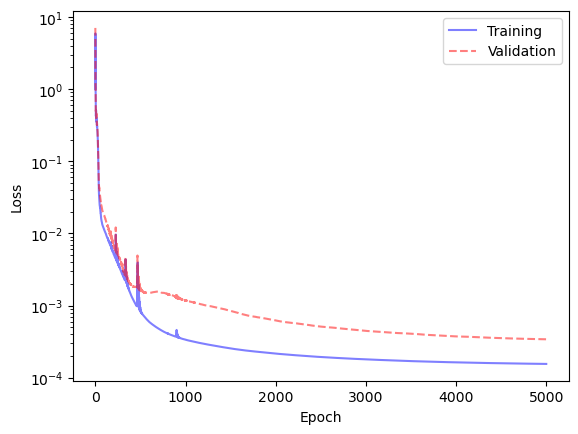

In [7]:
plt.figure()
plt.semilogy(range(len(lossHistory['training'])), lossHistory['training'], 'b', alpha = 0.5)
plt.semilogy(range(len(lossHistory['validation'])), lossHistory['validation'], 'r--', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

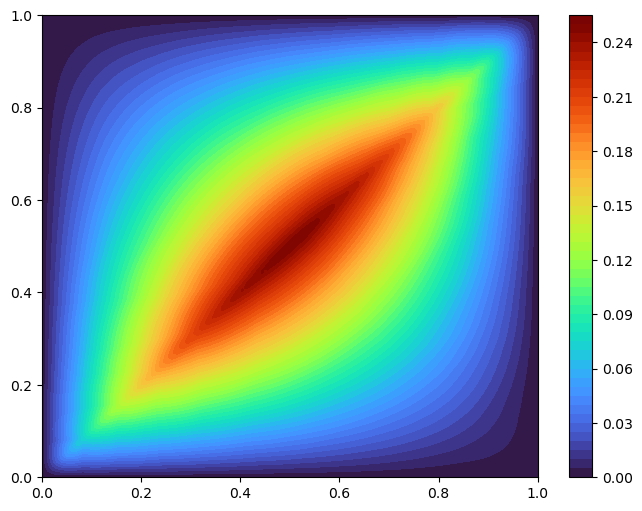

In [8]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xU, xF)
G = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

In [9]:
model.saveModels('savedModels/laplace')

In [10]:
savedModel = GreenNN()
savedModel.build(loadPath = 'savedModels/laplace')

In [12]:
def green(x,s):
    np.random.seed(42)
    g = 0
    g = (x <= s) * (x * (1-s)) + (x > s) * (s * (1-x))
    # g = g + np.random.normal(loc = 0.0, scale = 0.25 * eps * factor, size=x.shape)
    return g

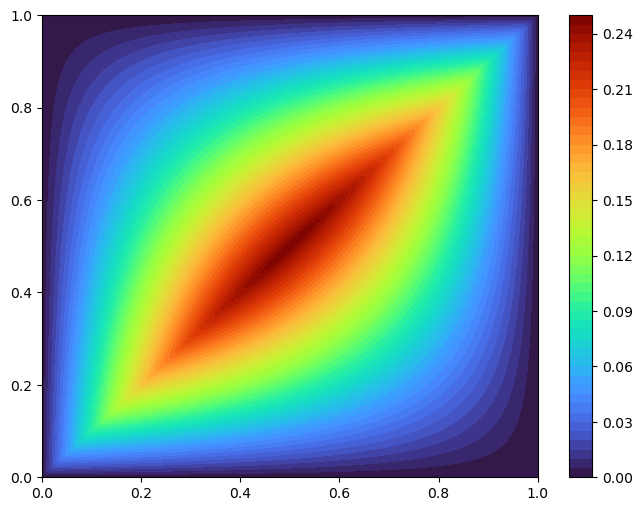

In [13]:
Gexact = green(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,Gexact, 50, cmap = 'turbo', vmin = np.min(Gexact), vmax = np.max(Gexact))
plt.colorbar()

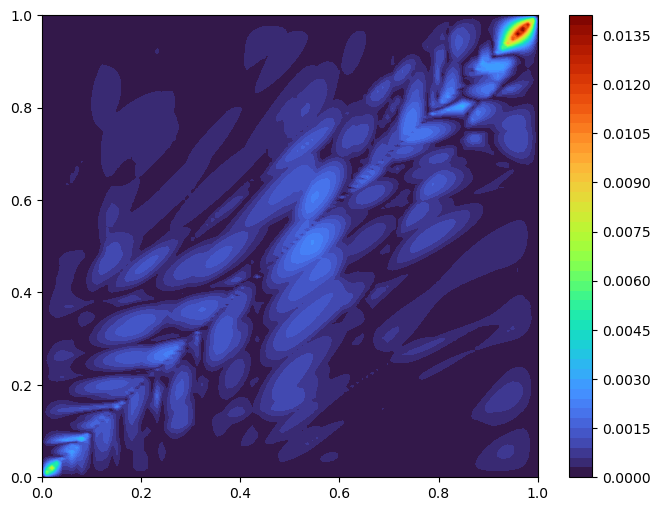

In [14]:
fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,np.abs(G-Gexact), 50, cmap = 'turbo')
plt.colorbar()